# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

**test и train обрабатывались одновременно, но комментарии по анализу/визуализации сделаны только для train**

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [52]:
# Загрузка датасета трейн
df_train = pd.read_csv("DLS/hw3/train.csv")
df_test = pd.read_csv("DLS/hw3/test.csv")
df_train

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [53]:
# Случайные строки через .sample
df_train.sample(15)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1221,6,19.70,113.5,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
2682,21,86.55,1857.25,Male,1,Yes,No,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,No,Bank transfer (automatic),0
5039,21,79.20,1742.45,Female,0,Yes,No,Yes,No,Fiber optic,No,No,Yes,Yes,No,No,One year,No,Electronic check,0
4708,47,60.00,2768.65,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),0
256,15,25.25,394.85,Female,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,0
5221,16,80.75,1321.3,Male,0,Yes,No,Yes,No,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,No,Bank transfer (automatic),0
1530,72,65.55,4807.45,Male,0,No,No,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),0
3073,10,18.85,163.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1143,72,90.15,6716.45,Female,1,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),0
1217,1,20.20,20.2,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,1


In [54]:
# Таблица с кол-вом NaN в столбцах
df_test.dropna()
df_train.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [55]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Случайные строки просмотрены.
Пропусков в датасете нет. 

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

array([[<Axes: title={'center': 'ClientPeriod'}>,
        <Axes: title={'center': 'MonthlySpending'}>]], dtype=object)

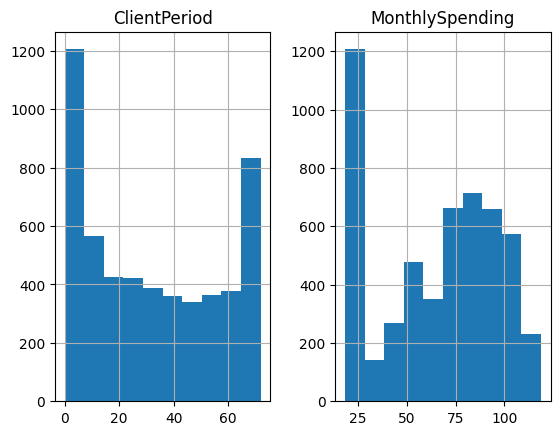

In [56]:
# Строим гистограммы
df_train[num_cols].hist()

Почему то не вывелось TotalSpent. Первая мысль: не тот тип данных. Почему? - Скорее всего есть пустые строки или другие пропуски.

In [57]:
# Проверяем типы данных
df_train.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

In [58]:
df_test.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
dtype: object

In [59]:
# Меняем тип данных на string, чтобы посмотреть на пустые строки
df_test = df_test.astype({'TotalSpent': 'string'})
df_test.loc[df_test['TotalSpent'] == " ", 'TotalSpent'].index

df_train = df_train.astype({'TotalSpent': 'string'})
df_train.loc[df_train['TotalSpent'] == " ", 'TotalSpent'].index

Index([1048, 1707, 2543, 3078, 3697, 4002, 4326, 4551, 4598], dtype='int64')

In [60]:
# Смотрим есть ли нули
df_train.loc[df_train['TotalSpent'] == "0.0", 'TotalSpent']

Series([], Name: TotalSpent, dtype: string)

Не уверен, что пропуски являлись нулями, поэтому заменю их на медианное значение, но сначала на NaN.

In [61]:
# Заменяем пропуски на NaN
df_test.loc[df_test['TotalSpent'] == " ", 'TotalSpent'] = np.nan

df_train.loc[df_train['TotalSpent'] == " ", 'TotalSpent'] = np.nan

In [62]:
# Проверяем
df_train.loc[df_train['TotalSpent'] == " ", 'TotalSpent'].index

Index([], dtype='int64')

In [63]:
# Переводим во float
df_test = df_test.astype({'TotalSpent': 'float64'})

df_train = df_train.astype({'TotalSpent': 'float64'})

In [64]:
# Заменяем NaN на медианное значение
df_test.fillna(df_test['TotalSpent'].median(), inplace=True)

df_train.fillna(df_train['TotalSpent'].median(), inplace=True)

array([[<Axes: title={'center': 'ClientPeriod'}>,
        <Axes: title={'center': 'MonthlySpending'}>],
       [<Axes: title={'center': 'TotalSpent'}>, <Axes: >]], dtype=object)

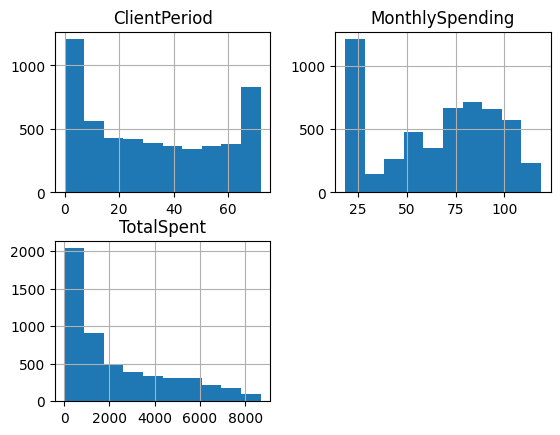

In [65]:
# Строим гистограммы
df_train[num_cols].hist()

<Axes: >

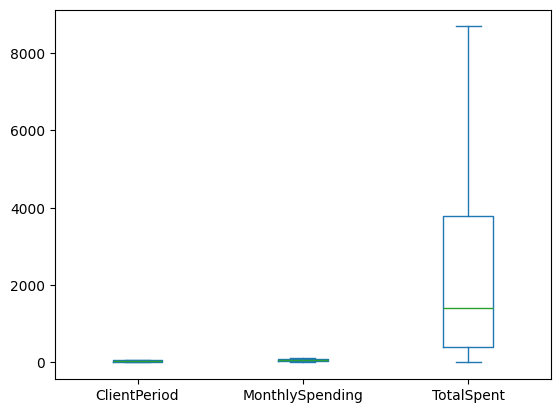

In [66]:
# Строим ящики с усами
df_train[num_cols].plot.box()

Выбросов нет, но из-за разности масштабов первые два ящика не сильно информативны.

<Axes: >

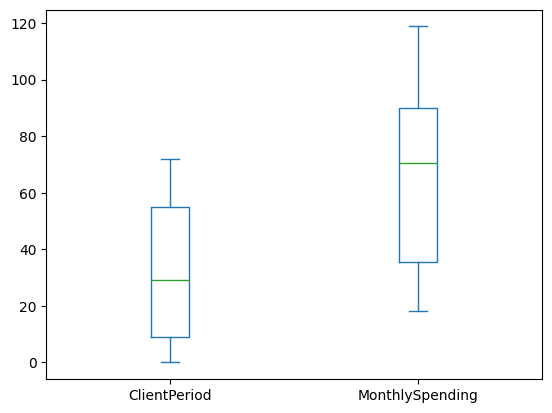

In [67]:
# Строим ящики с усами без TotalSpent
df_train[['ClientPeriod', 'MonthlySpending']].plot.box()

In [68]:
# Общий стат. анализ количественных признаков
df_train[num_cols].describe()

,ClientPeriod,MonthlySpending,TotalSpent
count,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2289.889086
std,24.550326,30.176464,2267.371263
min,0.000000,18.250000,18.800000
25%,9.000000,35.462500,401.587500
50%,29.000000,70.400000,1410.250000
75%,55.000000,90.050000,3795.212500
max,72.000000,118.750000,8684.800000


**Вывод по анализу количественных признаков:**
* Выбросов нет.
* В TotalSpent было несколько строк с пустыми значениями - были дропнуты.

In [69]:
# Количество категориальных признаков
len(cat_cols)

16

In [70]:
# value_counts для кат. признаков
for col in cat_cols:
    print(df_train[col].value_counts(), "\n")

Sex
Male      2655
Female    2627
Name: count, dtype: int64 

IsSeniorCitizen
0    4440
1     842
Name: count, dtype: int64 

HasPartner
No     2705
Yes    2577
Name: count, dtype: int64 

HasChild
No     3676
Yes    1606
Name: count, dtype: int64 

HasPhoneService
Yes    4761
No      521
Name: count, dtype: int64 

HasMultiplePhoneNumbers
No                  2511
Yes                 2250
No phone service     521
Name: count, dtype: int64 

HasInternetService
Fiber optic    2341
DSL            1800
No             1141
Name: count, dtype: int64 

HasOnlineSecurityService
No                     2612
Yes                    1529
No internet service    1141
Name: count, dtype: int64 

HasOnlineBackup
No                     2332
Yes                    1809
No internet service    1141
Name: count, dtype: int64 

HasDeviceProtection
No                     2317
Yes                    1824
No internet service    1141
Name: count, dtype: int64 

HasTechSupportAccess
No                     2604
Ye

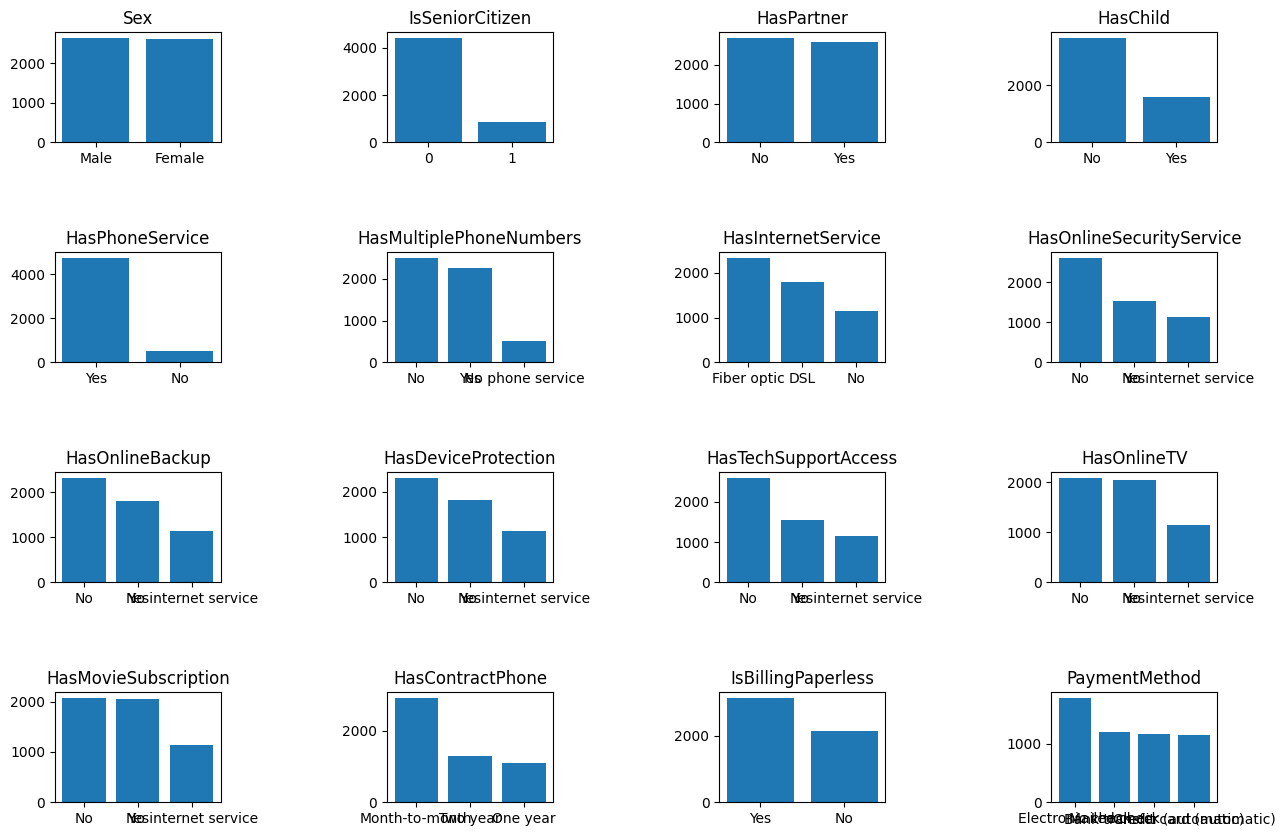

In [71]:
# Выведем столбчатые диаграммы кат. признаков
fig, axs = plt.subplots(4, 4, figsize=(15, 10))
fig.subplots_adjust(wspace=1, hspace=1)

for i in range(len(cat_cols)):
    axs[i//4][i%4].set_title(cat_cols[i])
    axs[i//4][i%4].bar(df_train[cat_cols[i]].value_counts().index, df_train[cat_cols[i]].value_counts().values)

На некоторых графиках небрежно подписаны категории на оси Х, но т.к. главной целью является само распределение внутри признаков и сами категории можно посмотреть выше в value_counts, то решил оставить без изменений.

В некоторых признаках есть категории, дублирующие другие признаки, например: в HasPhoneService и HasMultiplePhoneNumbers есть No в первом и повторяющее No phone service во втором. Думаю стоит заменить все подобные категории признаков на No во избежание мультиколлинеарности среди признаков.

In [72]:
# Проведем замену
for col in cat_cols:
    df_test[col].replace('No.+', 'No', regex=True, inplace=True)
    
for col in cat_cols:
    df_train[col].replace('No.+', 'No', regex=True, inplace=True)

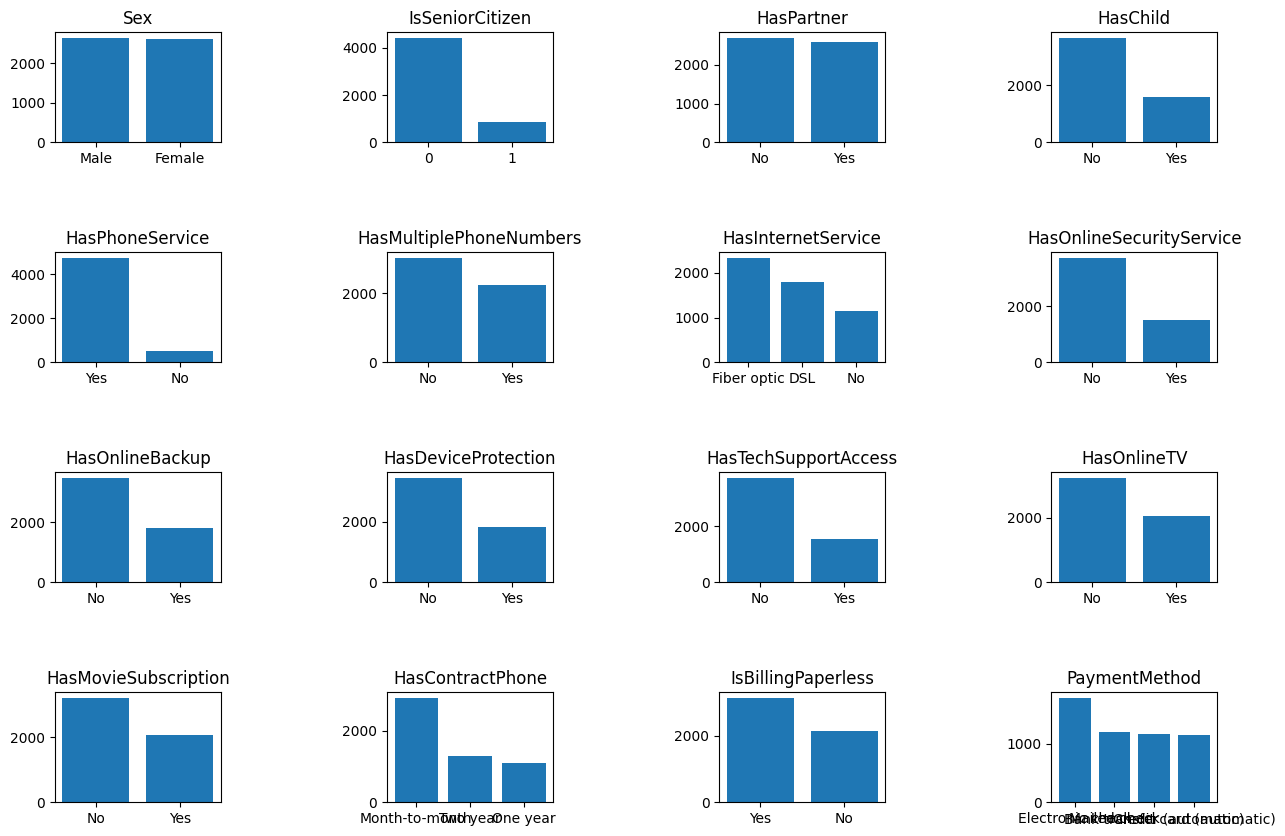

In [73]:
# Выведем столбчатые диаграммы кат. признаков,чтобы проверить
fig, axs = plt.subplots(4, 4, figsize=(15, 10))
fig.subplots_adjust(wspace=1, hspace=1)

for i in range(len(cat_cols)):
    axs[i//4][i%4].set_title(cat_cols[i])
    axs[i//4][i%4].bar(df_train[cat_cols[i]].value_counts().index, df_train[cat_cols[i]].value_counts().values)

**Вывод по анализу категориальных признаков:**
* Были выведены value_counts и столбчатые диаграммы.
* Заменены категории разряда "No ..." на "No", т.к. они дублировали другие столбцы.
* Категорий в признаках не много.

<Axes: >

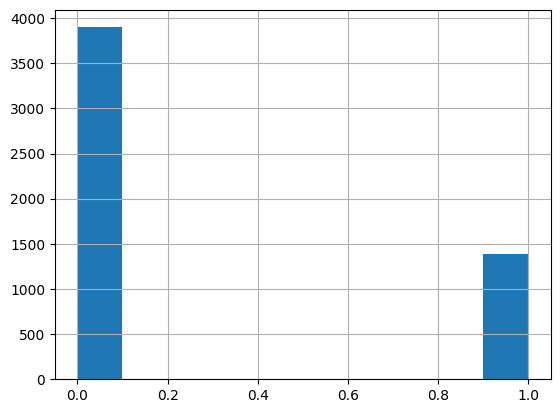

In [74]:
# Гистограмма целевой переменной
df_train['Churn'].hist()

In [75]:
# value_counts целевой переменной
df_train['Churn'].value_counts()

Churn
0    3898
1    1384
Name: count, dtype: int64

In [76]:
print(f"Процент значения {df_train['Churn'].value_counts().index[0]} в целевой переменной:", 
        f"{df_train['Churn'].value_counts().values[0]/(df_train['Churn'].value_counts().values.sum())}%")

Процент значения 0 в целевой переменной: 0.7379780386217342%


**Наблюдается перевес в целевой переменной, но не особо большой.**

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [77]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

Не вижу смысла в Ohe, т.к. большинство категориальных признаков и так 0 и 1, а остальные('PaymentMethod', 'HasContractPhone', 'HasInternetService') имеют мало категорий(4, 3, 3)

In [79]:
df_train_proc = df_train.copy()
df_test_proc = df_test.copy()

In [80]:
# label encoding для не бинарных категориальных признаков
label_encoding = LabelEncoder()

for column in ['PaymentMethod', 'HasContractPhone', 'HasInternetService']:
  df_train_proc[column] = label_encoding.fit_transform(df_train_proc[column])

for column in ['PaymentMethod', 'HasContractPhone', 'HasInternetService']:
  df_test_proc[column] = label_encoding.fit_transform(df_test_proc[column])

In [81]:
# Проверяем
df_train_proc[['PaymentMethod', 'HasContractPhone', 'HasInternetService']]

,PaymentMethod,HasContractPhone,HasInternetService
0,3,1,2
1,1,2,2
2,2,0,1
3,3,0,1
4,1,2,1
...,...,...,...
5277,2,0,0
5278,0,1,0
5279,3,0,0
5280,1,0,1


In [82]:
# StandardScaler для количественных признаков и признаков после label encoding
from sklearn.preprocessing import StandardScaler

num_cols = ['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'PaymentMethod', 'HasContractPhone', 'HasInternetService']

scaler = StandardScaler()

scaler.fit(df_test_proc[num_cols])
df_test_proc[num_cols] = scaler.transform(df_test_proc[num_cols])

scaler.fit(df_train_proc[num_cols])
df_train_proc[num_cols] = scaler.transform(df_train_proc[num_cols])

df_train_proc

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,0.920767,-1.505447,-0.557323,Male,0,Yes,Yes,Yes,No,1.528868,No,No,No,No,No,No,0.371436,No,1.340954,0
1,1.613288,-1.294998,-0.184235,Male,0,Yes,No,Yes,Yes,1.528868,No,No,No,No,No,No,1.567733,No,-0.535565,0
2,-1.279005,0.363737,-0.976549,Male,0,No,No,Yes,No,0.169588,No,No,No,Yes,No,No,-0.824861,Yes,0.402695,1
3,-0.016173,0.476418,0.123552,Female,1,Yes,No,Yes,Yes,0.169588,No,No,Yes,No,No,No,-0.824861,No,1.340954,0
4,1.124450,1.667856,1.970998,Female,0,Yes,Yes,Yes,Yes,0.169588,Yes,Yes,Yes,Yes,Yes,Yes,1.567733,No,-0.535565,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,-1.197532,-1.144204,-0.973792,Male,0,No,No,No,No,-1.189691,No,No,No,Yes,No,No,-0.824861,No,0.402695,0
5278,0.717084,-0.678565,-0.044743,Male,0,Yes,No,No,No,-1.189691,Yes,No,No,Yes,Yes,No,0.371436,Yes,-1.473824,0
5279,-1.279005,-0.327265,-0.985745,Male,0,No,No,Yes,No,-1.189691,No,No,Yes,Yes,No,No,-0.824861,No,1.340954,0
5280,-0.138382,0.367051,-0.032922,Female,0,No,No,Yes,Yes,0.169588,No,No,No,No,No,No,-0.824861,Yes,-0.535565,0


In [83]:
# Меняем Yes/No на 1/0
for col in cat_cols:
    df_train_proc.loc[df_train_proc[col] == 'Yes', col] = 1
    df_train_proc.loc[df_train_proc[col] == 'No', col] = 0

    df_test_proc.loc[df_test_proc[col] == 'Yes', col] = 1
    df_test_proc.loc[df_test_proc[col] == 'No', col] = 0

In [84]:
# Отдельно для Sex меняем Male/Female на 1/0
df_train_proc.loc[df_train_proc['Sex'] == 'Male', 'Sex'] = 1
df_train_proc.loc[df_train_proc['Sex'] == 'Female', 'Sex'] = 0

df_test_proc.loc[df_test_proc['Sex'] == 'Male', 'Sex'] = 1
df_test_proc.loc[df_test_proc['Sex'] == 'Female', 'Sex'] = 0

In [85]:
# Меняем типы данных
df_train_proc = df_train_proc.astype('float64')
df_test_proc = df_test_proc.astype('float64')

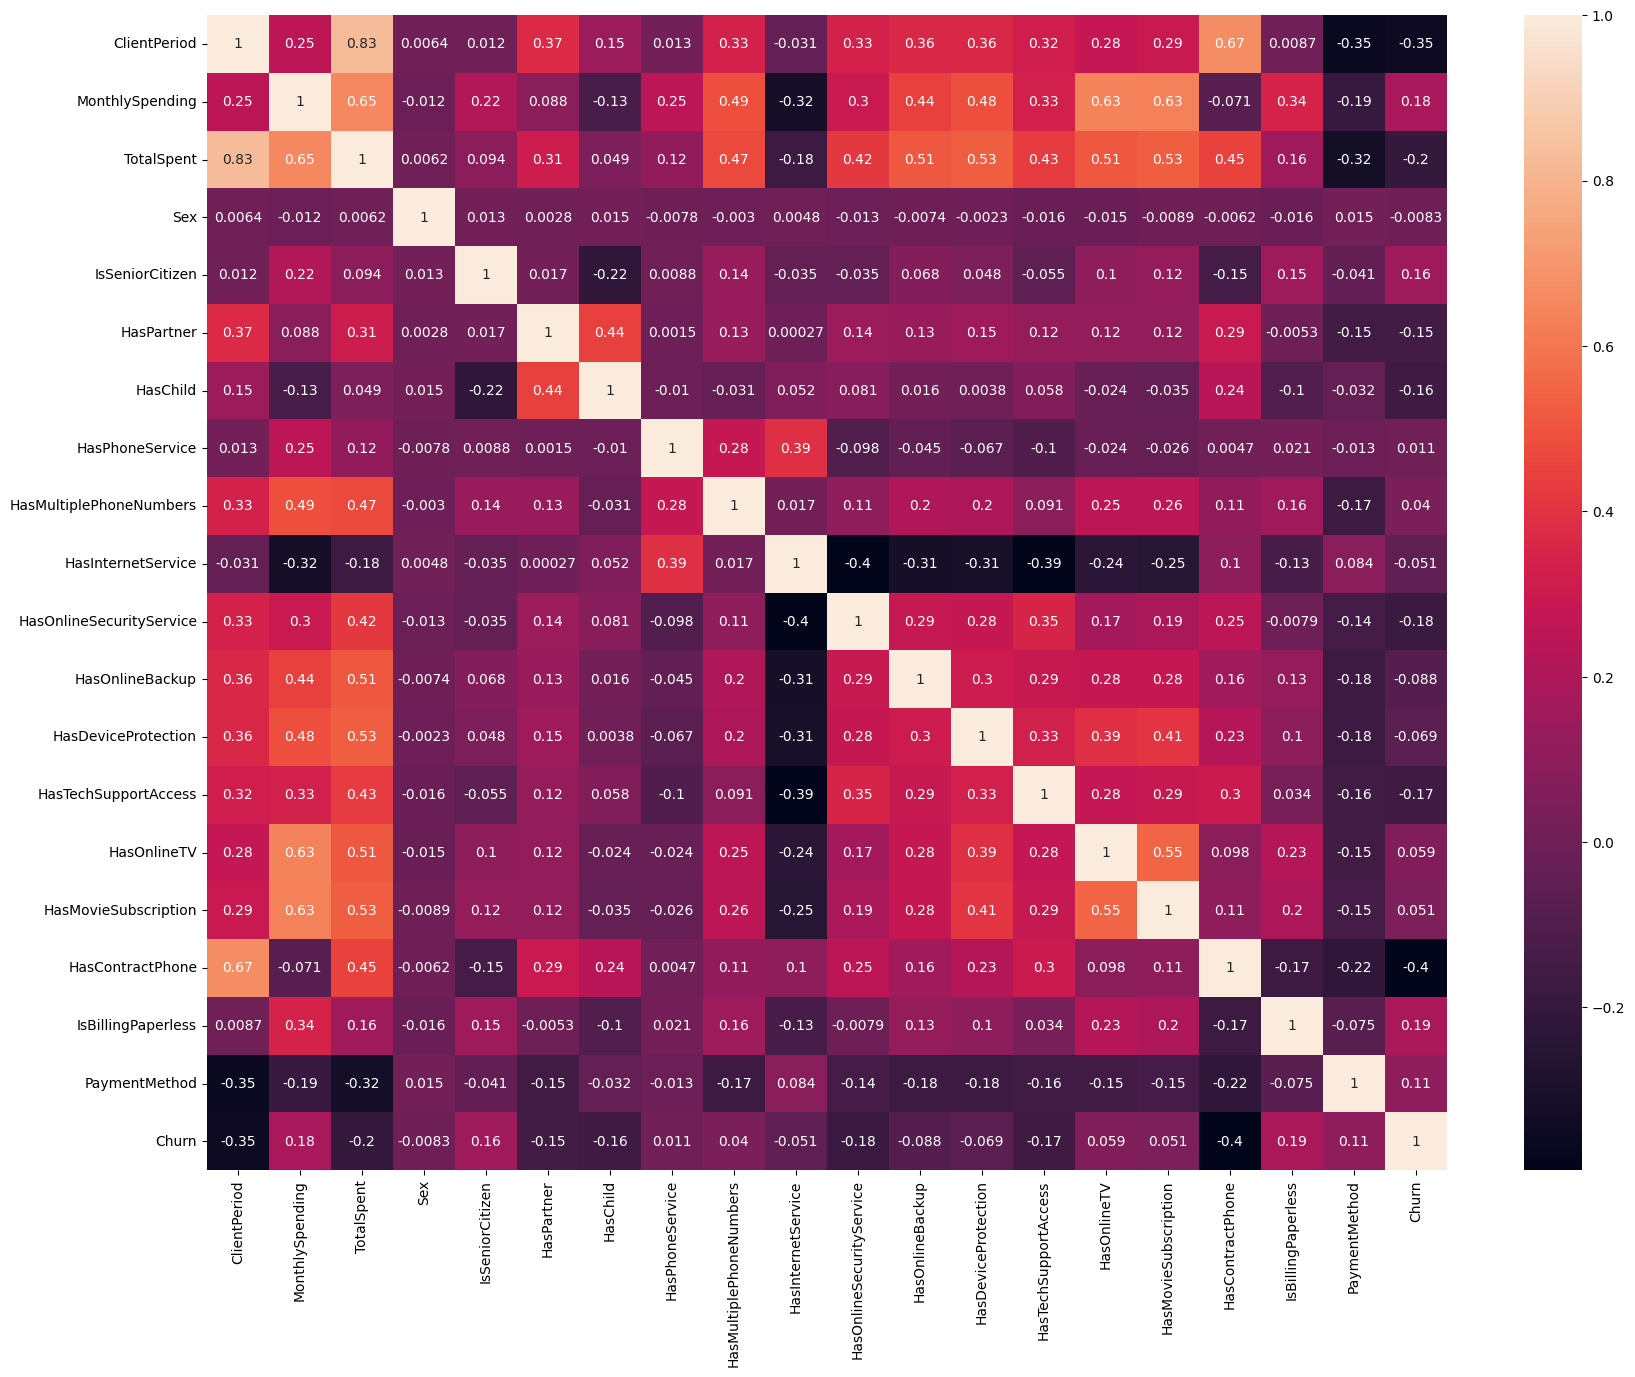

In [86]:
# Матрица корреляций для себя
import seaborn as sns

corrmap = df_train_proc.corr()
fig, axes = plt.subplots(1, 1, figsize=(20, 15))
sns.heatmap(corrmap, annot=True, ax=axes)
plt.show()

In [87]:
# Разделение на Х и у
X = df_train_proc.drop(columns=['Churn']).values
y = df_train_proc['Churn']

In [88]:
# Деление на test/valid
X_train, X_valid, y_train, y_valid = train_test_split(X, y,train_size=0.8,random_state=42)

In [89]:
# Использую LogisticRegressionCV
LRCV = LogisticRegressionCV(cv=5, random_state=0, scoring='roc_auc', refit=True)
LRCV.fit(X_train, y_train)

y_pred = LRCV.predict(X_valid)

In [90]:
# Метрика roc_auc_score
from sklearn.metrics import roc_auc_score

train_auc = roc_auc_score(y_valid, y_pred)
print(f"roc_auc: {train_auc}")

roc_auc: 0.6876067823533215


In [91]:
# Для test.csv
X_test = df_test_proc.values
y_test = LRCV.predict(X_test)
y_test

array([0., 1., 1., ..., 1., 1., 0.])

In [92]:
# Загружаем y_test в submission
submission = pd.read_csv("DLS/hw3/submission.csv")
submission['Churn'] = y_test
submission.to_csv("DLS/hw3/new_submission.csv", index=False)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

**Результат на kaggle: 0.72345**

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [93]:
import catboost

In [96]:
# Категориальный признак, который ошибочно int
df_train = df_train.astype({'IsSeniorCitizen': 'object'})

In [124]:
# Разделение на Х и у
X = df_train.drop(columns=['Churn']).values
y = df_train['Churn']

X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                       train_size=0.8,
                                                       random_state=0)

In [108]:
# CatBoostClassifier со стандартными параметрами.
boosting_model = catboost.CatBoostClassifier()

boosting_model.fit(X_train, y_train, cat_features=[x for x in range(3,19)])

y_train_predicted = boosting_model.predict_proba(X_valid)

Learning rate set to 0.019062
0:	learn: 0.6823288	total: 227ms	remaining: 3m 46s
1:	learn: 0.6704054	total: 274ms	remaining: 2m 16s
2:	learn: 0.6585011	total: 328ms	remaining: 1m 48s
3:	learn: 0.6469461	total: 377ms	remaining: 1m 33s
4:	learn: 0.6364656	total: 426ms	remaining: 1m 24s
5:	learn: 0.6257547	total: 479ms	remaining: 1m 19s
6:	learn: 0.6163809	total: 532ms	remaining: 1m 15s
7:	learn: 0.6063851	total: 580ms	remaining: 1m 11s
8:	learn: 0.5976721	total: 633ms	remaining: 1m 9s
9:	learn: 0.5896264	total: 688ms	remaining: 1m 8s
10:	learn: 0.5820772	total: 749ms	remaining: 1m 7s
11:	learn: 0.5739849	total: 797ms	remaining: 1m 5s
12:	learn: 0.5667822	total: 851ms	remaining: 1m 4s
13:	learn: 0.5602885	total: 903ms	remaining: 1m 3s
14:	learn: 0.5535344	total: 963ms	remaining: 1m 3s
15:	learn: 0.5469837	total: 1.03s	remaining: 1m 3s
16:	learn: 0.5408741	total: 1.09s	remaining: 1m 3s
17:	learn: 0.5355060	total: 1.15s	remaining: 1m 2s
18:	learn: 0.5306419	total: 1.21s	remaining: 1m 2s
19:

In [112]:
# Roc_auc
train_auc = roc_auc_score(y_valid, y_train_predicted[:, 1])
print(f"roc_auc: {train_auc}")

roc_auc: 0.8200990585109456


In [121]:
# Подбор гиперпараметров
iter = [200, 500, 800]
lr = [0.1, 0.5, 1, 2]
roc_auc = []
def func(i, j):
    boosting_model = catboost.CatBoostClassifier(learning_rate=lr[j], iterations=iter[i])
    boosting_model.fit(X_train, y_train, cat_features=[x for x in range(3,19)])
    y_train_predicted = boosting_model.predict_proba(X_valid)
    train_auc = roc_auc_score(y_valid, y_train_predicted[:, 1])
    roc_auc.append(train_auc)

for i in range(len(iter)):
    for j in range(len(lr)):
        func(i,j)

for i in range(len(iter)):
    for j in range(len(lr)):
        print(f"roc_auc with iterations: {iter[i]} and learning-rate:{lr[j]}:\n {roc_auc[4*i+j]}\n")

0:	learn: 0.6399351	total: 127ms	remaining: 25.3s
1:	learn: 0.5897836	total: 180ms	remaining: 17.8s
2:	learn: 0.5495173	total: 238ms	remaining: 15.6s
3:	learn: 0.5208817	total: 294ms	remaining: 14.4s
4:	learn: 0.5004368	total: 357ms	remaining: 13.9s
5:	learn: 0.4836126	total: 412ms	remaining: 13.3s
6:	learn: 0.4697666	total: 465ms	remaining: 12.8s
7:	learn: 0.4585996	total: 518ms	remaining: 12.4s
8:	learn: 0.4491882	total: 571ms	remaining: 12.1s
9:	learn: 0.4394795	total: 631ms	remaining: 12s
10:	learn: 0.4341808	total: 684ms	remaining: 11.7s
11:	learn: 0.4277318	total: 735ms	remaining: 11.5s
12:	learn: 0.4223279	total: 789ms	remaining: 11.3s
13:	learn: 0.4189511	total: 842ms	remaining: 11.2s
14:	learn: 0.4155366	total: 899ms	remaining: 11.1s
15:	learn: 0.4127896	total: 954ms	remaining: 11s
16:	learn: 0.4115112	total: 990ms	remaining: 10.7s
17:	learn: 0.4096636	total: 1.05s	remaining: 10.6s
18:	learn: 0.4091136	total: 1.07s	remaining: 10.2s
19:	learn: 0.4071692	total: 1.12s	remaining: 

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.5451855	total: 46ms	remaining: 9.15s
1:	learn: 0.5585224	total: 88ms	remaining: 8.72s
2:	learn: 0.5444786	total: 139ms	remaining: 9.1s
3:	learn: 0.5437716	total: 193ms	remaining: 9.45s
4:	learn: 0.5221793	total: 250ms	remaining: 9.76s
5:	learn: 0.5267345	total: 306ms	remaining: 9.89s
6:	learn: 0.5206451	total: 356ms	remaining: 9.83s
7:	learn: 0.5216052	total: 410ms	remaining: 9.84s
8:	learn: 0.5217417	total: 462ms	remaining: 9.81s
9:	learn: 0.5238313	total: 517ms	remaining: 9.83s
10:	learn: 0.5200786	total: 572ms	remaining: 9.82s
11:	learn: 0.5285248	total: 630ms	remaining: 9.87s
12:	learn: 0.5140749	total: 683ms	remaining: 9.82s
13:	learn: 0.5126988	total: 736ms	remaining: 9.78s
14:	learn: 0.5056220	total: 786ms	remaining: 9.7s
15:	learn: 0.5047500	total: 836ms	remaining: 9.62s
16:	learn: 0.4953659	total: 891ms	remaining: 9.59s
17:	learn: 0.4971568	total: 950ms	remaining: 9.61s
18:	learn: 0.4897761	total: 999ms	remaining: 9.52s
19:	learn: 0.4919623	total: 1.05s	remaining: 

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.5451855	total: 57.5ms	remaining: 28.7s
1:	learn: 0.5585224	total: 104ms	remaining: 25.8s
2:	learn: 0.5444786	total: 160ms	remaining: 26.5s
3:	learn: 0.5437716	total: 212ms	remaining: 26.3s
4:	learn: 0.5221793	total: 265ms	remaining: 26.3s
5:	learn: 0.5267345	total: 320ms	remaining: 26.4s
6:	learn: 0.5206451	total: 374ms	remaining: 26.4s
7:	learn: 0.5216052	total: 425ms	remaining: 26.1s
8:	learn: 0.5217417	total: 480ms	remaining: 26.2s
9:	learn: 0.5238313	total: 531ms	remaining: 26s
10:	learn: 0.5200786	total: 586ms	remaining: 26.1s
11:	learn: 0.5285248	total: 637ms	remaining: 25.9s
12:	learn: 0.5140749	total: 688ms	remaining: 25.8s
13:	learn: 0.5126988	total: 738ms	remaining: 25.6s
14:	learn: 0.5056220	total: 790ms	remaining: 25.5s
15:	learn: 0.5047500	total: 845ms	remaining: 25.6s
16:	learn: 0.4953659	total: 896ms	remaining: 25.5s
17:	learn: 0.4971568	total: 952ms	remaining: 25.5s
18:	learn: 0.4897761	total: 1s	remaining: 25.4s
19:	learn: 0.4919623	total: 1.06s	remaining: 

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 0.5451855	total: 45.4ms	remaining: 36.2s
1:	learn: 0.5585224	total: 93ms	remaining: 37.1s
2:	learn: 0.5444786	total: 146ms	remaining: 38.8s
3:	learn: 0.5437716	total: 203ms	remaining: 40.5s
4:	learn: 0.5221793	total: 257ms	remaining: 40.9s
5:	learn: 0.5267345	total: 312ms	remaining: 41.3s
6:	learn: 0.5206451	total: 367ms	remaining: 41.6s
7:	learn: 0.5216052	total: 420ms	remaining: 41.6s
8:	learn: 0.5217417	total: 476ms	remaining: 41.9s
9:	learn: 0.5238313	total: 530ms	remaining: 41.9s
10:	learn: 0.5200786	total: 583ms	remaining: 41.8s
11:	learn: 0.5285248	total: 639ms	remaining: 41.9s
12:	learn: 0.5140749	total: 695ms	remaining: 42.1s
13:	learn: 0.5126988	total: 749ms	remaining: 42s
14:	learn: 0.5056220	total: 804ms	remaining: 42.1s
15:	learn: 0.5047500	total: 863ms	remaining: 42.3s
16:	learn: 0.4953659	total: 920ms	remaining: 42.4s
17:	learn: 0.4971568	total: 979ms	remaining: 42.5s
18:	learn: 0.4897761	total: 1.04s	remaining: 42.6s
19:	learn: 0.4919623	total: 1.16s	remaining

In [123]:
# Общий список roc_auc
roc_auc

[0.8179908161497141,
 0.7909422591886636,
 0.7821964227266601,
 0.7360894510868518,
 0.8026795856678026,
 0.7882756695354165,
 0.7749860413176997,
 0.7562717803577275,
 0.7964751920522153,
 0.7881408960511369,
 0.7746683609618977,
 0.75423573807736]

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ВАШ ОТВЕТ

**Лучший результат дал CatBoost со стандартными гиперпараметрами(1000 iterations и 0.2 learning-rate): 0.82**

# Предсказания

In [115]:
best_model = boosting_model

In [116]:
# Для submission
X_test = df_test.values
y_test_predicted = best_model.predict_proba(X_test)
submission = pd.read_csv("DLS/hw3/submission.csv")
submission['Churn'] = y_test_predicted[:, 1]
submission.to_csv("DLS/hw3/new_submission.csv", index=False)

**Лучший результат на kaggle дал CatBoost с стандартными гиперпараметрами: 0.852**